In [1]:
import pandas as pd

## 1st dataset

In [2]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [6]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)


In [7]:
df=pd.DataFrame(te_ary,columns=te.columns_)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [8]:
import matplotlib.pyplot as plt 

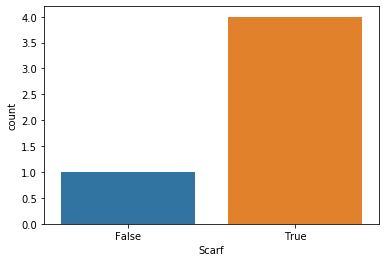

In [22]:
import seaborn as sns 
sns.countplot(df["Scarf"])

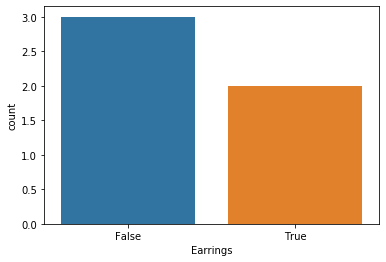

In [20]:
import seaborn as sns 
sns.countplot(df["Earrings"])

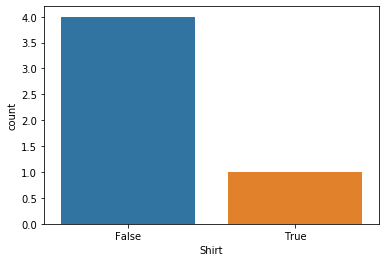

In [23]:
import seaborn as sns 
sns.countplot(df["Shirt"])

In [65]:
from mlxtend.frequent_patterns import apriori 
frequent_itemsets=apriori(df,min_support=0.6,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [67]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [76]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


a really good strategy to apply in this case is putting together skirts and pants in one item  with a discount , ore getting a discount on one of them if the other is baught 

# 2nd dataset 

In [71]:
market=pd.read_csv("Market_Basket_Optimisation(1).csv",header=None )
market.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
groceries = []
for i in range(0,len(market)):
    groceries.append([str(market.values[i,j]) for j in range(len(market.columns))])

In [84]:
te_ary=te.fit(groceries).transform(groceries)

In [113]:
df=pd.DataFrame(te_ary,columns=te.columns_ )
df = pd.DataFrame(te_ary)
df.to_csv('te_ary.csv', header=False, index=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [115]:
df=pd.DataFrame(te_ary,columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [122]:
col=df.columns
col.tolist()

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [131]:
from mlxtend.frequent_patterns import apriori 
frequent_itemsets=apriori(df,min_support=0.15,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.238368,(mineral water)
4,0.999867,(nan)
5,0.174110,(spaghetti)
6,0.163845,"(nan, chocolate)"
7,0.179709,"(eggs, nan)"
8,0.170911,"(nan, french fries)"
9,0.238235,"(nan, mineral water)"


In [132]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(nan),0.163845,0.999867,0.163845,1.000000,1.000133,0.000022,inf
1,(eggs),(nan),0.179709,0.999867,0.179709,1.000000,1.000133,0.000024,inf
2,(french fries),(nan),0.170911,0.999867,0.170911,1.000000,1.000133,0.000023,inf
3,(nan),(mineral water),0.999867,0.238368,0.238235,0.238267,0.999574,-0.000102,0.999867
4,(mineral water),(nan),0.238368,0.999867,0.238235,0.999441,0.999574,-0.000102,0.238368
5,(spaghetti),(nan),0.174110,0.999867,0.174110,1.000000,1.000133,0.000023,inf


In [140]:
association_rules(frequent_itemsets,metric="lift",min_threshold=0.9).sort_values('lift',ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(nan),(mineral water),0.999867,0.238368,0.238235,0.238267,0.999574,-0.000102,0.999867
7,(mineral water),(nan),0.238368,0.999867,0.238235,0.999441,0.999574,-0.000102,0.238368
0,(nan),(chocolate),0.999867,0.163845,0.163845,0.163867,1.000133,0.000022,1.000026
1,(chocolate),(nan),0.163845,0.999867,0.163845,1.000000,1.000133,0.000022,inf
2,(eggs),(nan),0.179709,0.999867,0.179709,1.000000,1.000133,0.000024,inf
3,(nan),(eggs),0.999867,0.179709,0.179709,0.179733,1.000133,0.000024,1.000029
4,(nan),(french fries),0.999867,0.170911,0.170911,0.170933,1.000133,0.000023,1.000027
5,(french fries),(nan),0.170911,0.999867,0.170911,1.000000,1.000133,0.000023,inf
8,(spaghetti),(nan),0.174110,0.999867,0.174110,1.000000,1.000133,0.000023,inf
9,(nan),(spaghetti),0.999867,0.174110,0.174110,0.174133,1.000133,0.000023,1.000028


this rule states that mineral water and nan  are bought frequently. The support for mineral water is 0.238. The confidence for this rule is 0.999441 which means that out of all the transactions containing mushroom, 99% of the transactions are likely to contain nan as well. Finally, lift of 0.999574 shows that nan is 99% more likely to be bought by the customers that buy mineral water, compared to its default sale.

From the output above, we see that the top associations are not surprising,nan is always paired with mineral water(since that's how it is made for the babies), and sometimes with other items rhat might be served with as well 

As mentioned, one common application of association rules mining is in the domain of recommender systems. Once item pairs have been identified as having positive relationship, recommendations can be made to customers in order to increase sales. And hopefully, along the way, also introduce customers to items they never would have tried before or even imagined existed!

one strategy to consider in this case , is to put nan in the first rows and mineral water in the last rows , in that way the customer is forced to go by all the other rows and unintintionally he'll buy other things that encounter him in his way there . another technique is to make discounts on water for example if 2 bottles of nan are baught .Another strategy is to package both items together and sell them with a lower price or just discount one of them if the other is baught 